In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math

# Define the functions for the prediction and error calculation:

In [2]:
def calculatePath ( x_or_ypoints, timeDelta):
 
    timeArray = np.arange(0, timeDelta*len(x_or_ypoints), timeDelta)
    timeArray = timeArray.reshape(-1, 1) #must be reshaped, otherwise the regression can't be done

    polynomial = PolynomialFeatures(degree=2, include_bias=False)
    polynomial_features = polynomial.fit_transform(timeArray.reshape(-1, 1))
    polynomial_regression_model = LinearRegression()

    model = polynomial_regression_model.fit(polynomial_features, x_or_ypoints)

    return model.coef_, model.intercept_

In [3]:
def predictNextPositions (points, coefficients, intercept, timeDelta, timeToPredict):
    predictedPoints = [] #Empty list where the future X or Y values will be stored
    timeValue = (len(points)-1)*timeDelta #Time value of the last known point assuming first element of the list points is in t=0
    finalTimeToPredict = timeValue+timeToPredict #Calculate the time value for the last point that is gonna be predicted
    
    while timeValue < finalTimeToPredict:
        timeValue = timeValue+timeDelta
        predictedPoints.append(timeValue**2*coefficients[1]+timeValue*coefficients[0]+intercept)
    
    return predictedPoints

In [4]:
def euclideanDistance (x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

calculateErrors iterates through the predicted points and calculates their error with respect to the real data point.

In [5]:
def calculateErrors (firstPointPosi, timeToPredict, timeBetweenSamples, xPositons, yPositioins, xPredictions, yPredictions):
    index = firstPointPosi
    errorList = []
    while index < firstPointPosi+(timeToPredict/timeBetweenSamples):
        error = euclideanDistance(xPositions[index], yPositions[index], xPredictions[index-firstPointPosi], yPredictions[index-firstPointPosi])
        errorList.append(error)
        index = index+1
    return errorList

In [6]:
def calculateRMSError (errorList):
    length = len(errorList)
    width = len(errorList[0])
    
    errorSumList = []
    
    indexLength = 0
    indexWitdth = 0
    while indexWitdth < width:
        sumOfErrors = 0
        indexLength = 0
        while indexLength < length:
            sumOfErrors = sumOfErrors + errorList[indexLength][indexWitdth]**2
            indexLength = indexLength + 1
            
        errorSumList.append(math.sqrt(sumOfErrors/length))
        indexWitdth = indexWitdth+1
    return errorSumList

In [7]:
def calcualteAverageError (errorList):
    length = len(errorList)
    width = len(errorList[0])
    
    errorSumList = []
    
    indexLength = 0
    indexWitdth = 0
    while indexWitdth < width:
        sumOfErrors = 0
        indexLength = 0
        while indexLength < length:
            sumOfErrors = sumOfErrors + errorList[indexLength][indexWitdth]
            indexLength = indexLength + 1
            
        errorSumList.append(sumOfErrors/length)
        indexWitdth = indexWitdth+1
    return errorSumList

In [8]:
def plotter (xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetoPredict):
    plt.figure()
    plt.grid("True")
    plt.scatter(xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], yPositions [startingPoint+increment: startingPoint+increment+amountOfPoints], label = "UWB positions for prediction", color = "r", marker = "1")
    plt.scatter(xPredictions, yPredictions, label= "Predicted positions", color = "g", marker = "2")
    plt.scatter(xPositions[startingPoint+increment+amountOfPoints+1: -1], yPositions [startingPoint+increment+amountOfPoints+1: -1], label = "Real future positions", color = "b", marker = "3")
    plt.xlim(-2, 2)
    plt.legend()
    plt.title("Path with prediction done for %s secs, considering last %s positions" % (timetoPredict, amountOfPoints))
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.show()

# Straight line: x = constant | y = increase and decrease

In [9]:
xPositions = np.zeros(41)
yPositions = np.arange(0, 10.25, 0.25)

extraX = np.zeros(41)
extraY = np.arange(10, -0.25, -0.25)

xPositions = np.append(xPositions, extraX)
yPositions = np.append(yPositions, extraY)


### Plot the data without noise.

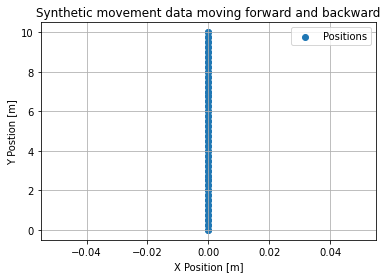

In [10]:
plt.figure()
plt.scatter(xPositions, yPositions, label = "Positions")
plt.grid("True")
plt.title("Synthetic movement data moving forward and backward")
plt.xlabel("X Position [m]")
plt.ylabel("Y Postion [m]")
plt.legend()
plt.show()

Add Gaussian noise with a mean value of 0 and standard deviation of 0.05 to the data.

In [11]:
gaussianNoise = np.random.normal(0,0.05,82)

index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

### Plot the data with noise.

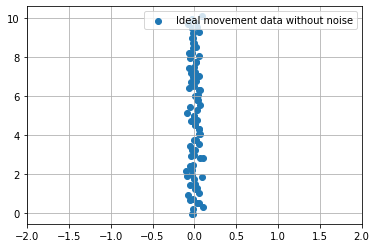

In [12]:
plt.figure()
plt.scatter(xPositions, yPositions, label = "Ideal movement data without noise")
plt.grid("True")
plt.legend()
plt.xlim(-2, 2)
plt.show()

# Point 1 analysis:
A point of the straight line going forward has been taken, only taking into account other points of the straight line to do the predictions

## General plot: timeToPredict = 6s, currentPoint = 16, amountOfPoints = 12

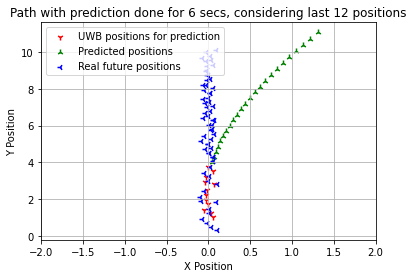

In [13]:
timeBetweenSamples = 0.25 # This is dt of Kalman Filter
timetopredict = 6 # Make this number 24 and it should be the number of predictions of the Kalman Filter
currentPoint = 16 # Give this value to the counter
increment = 0
amountOfPoints = 12 # Make this value equal to current point

startingPoint = currentPoint-amountOfPoints # Do not change it

# Dont use the following 4 lines, use the Kalman prediction to get the predictions in xPredictions and yPredictions
personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)

plotter(xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


## Analysis 1: timeToPredict = 6s, currentPoint = 20, amountOfPoints = 12 (10000 iterations):

Due to the lack of consistency of the tests with a few iterations, more iterations have been done to identify a solid pattern. Every run the different calcualtions can vary a lot, but the result of the 10000 doesn't.

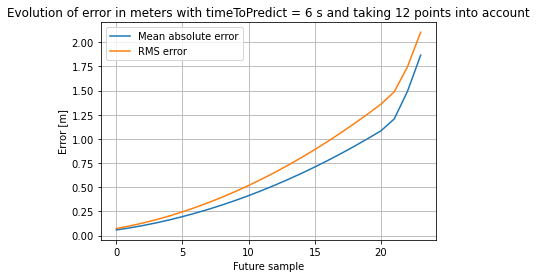

In [14]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 20
increment = 0
amountOfPoints = 12 

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints 

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors1 = calcualteAverageError(totalErrorList)
RMSErrors1 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors1, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors1, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


## Analysis 2: timeToPredict = 6s, currentPoint = 20, amountOfPoints = 16 (10000 iterations):

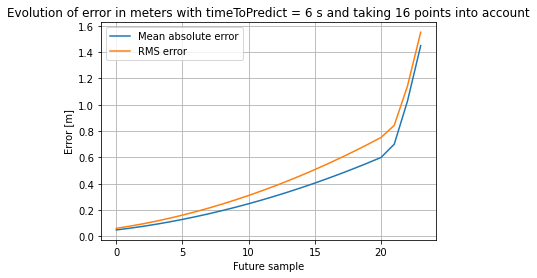

In [15]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 20 #Oldest point taken into account for prediction at t = 0s
increment = 0
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors2 = calcualteAverageError(totalErrorList)
RMSErrors2 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors2, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors2, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


## Analysis 3: timeToPredict = 6s, currentPoint = 20, amountOfPoints = 20 (10000 iterations):

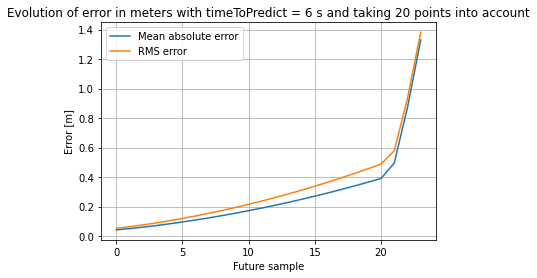

In [16]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 20 #Oldest point taken into account for prediction at t = 0s
increment = 0
amountOfPoints = 20 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors3 = calcualteAverageError(totalErrorList)
RMSErrors3 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors3, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors3, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


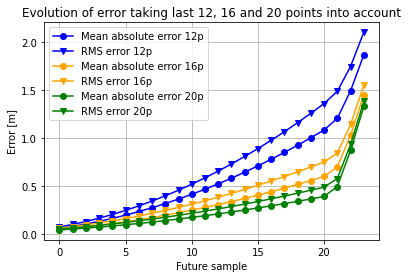

In [17]:
plt.figure()
plt.title("Evolution of error taking last 12, 16 and 20 points into account")
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.plot(sampleArray, averageErrors1, label="Mean absolute error 12p", color="b", marker = "o")
plt.plot(sampleArray, RMSErrors1, label="RMS error 12p", color="b", marker = "v")
plt.plot(sampleArray, averageErrors2, label="Mean absolute error 16p", color="orange", marker = "o")
plt.plot(sampleArray, RMSErrors2, label="RMS error 16p", color="orange", marker = "v")
plt.plot(sampleArray, averageErrors3, label="Mean absolute error 20p", color="green", marker = "o")
plt.plot(sampleArray, RMSErrors3, label="RMS error 20p", color="green", marker = "v")
plt.legend()
plt.show()

<b>Note that the results are the same as the ones obtained in the straight line analysis, which makes sense since this part of the path is just a straight line.<b>

# Point 2 analysis:
A point just before turning has been taken into account. Since the algorithm does not have any information about the future turn, it is expected to get high error.

In [18]:
xPositions = np.zeros(41)
yPositions = np.arange(0, 10.25, 0.25)

extraX = np.zeros(41)
extraY = np.arange(10, -0.25, -0.25)

xPositions = np.append(xPositions, extraX)
yPositions = np.append(yPositions, extraY)

gaussianNoise = np.random.normal(0,0.05,82)


index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

## General plot: timeToPredict = 6s, currentPoint = 34 , amountOfPoints = 12

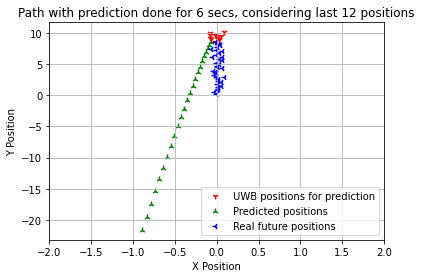

In [19]:
timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 34 #Oldest point taken into account for prediction at t = 1s
increment = 0
amountOfPoints = 12 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

startingPoint = currentPoint-startingPoint

personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
plotter(xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


## Analysis 1: timeToPredict = 6s, currentPoint = 34, amountOfPoints = 12 (1000 iterations):

Due to the lack of consistency of the tests with a few iterations, more iterations have been done to identify a solid pattern. Every run the different calcualtions can vary a lot, but the result of the 10000 doesn't.

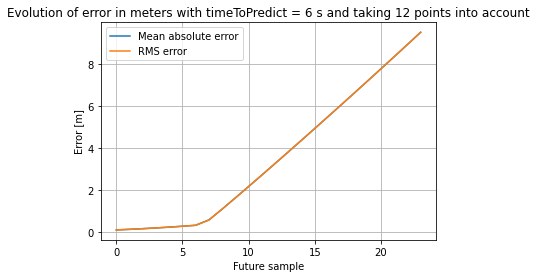

In [20]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 34 #Oldest point taken into account for prediction at t = 1s
increment = 0
amountOfPoints = 12 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
averageErrors1 = calcualteAverageError(totalErrorList)
RMSErrors1 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors1, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors1, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


## Analysis 2: timeToPredict = 6s, currentPoint = 34, amountOfPoints = 16 (10000 iterations):

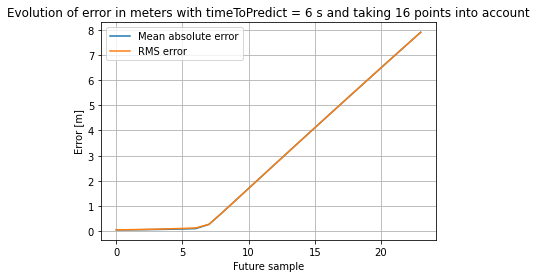

In [21]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 34 #Oldest point taken into account for prediction at t = 0s
increment = 0
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    xPositionsWithNoise.clear()
    
averageErrors2 = calcualteAverageError(totalErrorList)
RMSErrors2 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors2, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors2, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


## Analysis 2: timeToPredict = 6s, currentPoint = 34, amountOfPoints = 20 (10000 iterations):

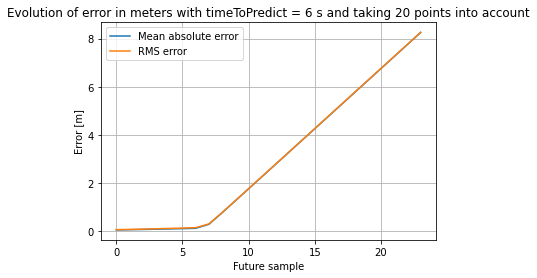

In [22]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 34 #Oldest point taken into account for prediction at t = 0s
increment = 0
amountOfPoints = 20 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors3 = calcualteAverageError(totalErrorList)
RMSErrors3 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors3, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors3, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


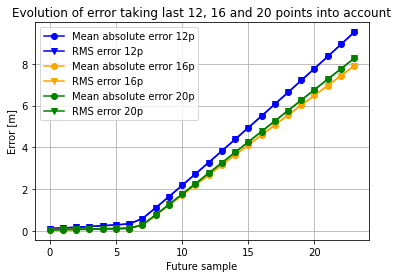

In [23]:
plt.figure()
plt.title("Evolution of error taking last 12, 16 and 20 points into account")
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.plot(sampleArray, averageErrors1, label="Mean absolute error 12p", color="b", marker = "o")
plt.plot(sampleArray, RMSErrors1, label="RMS error 12p", color="b", marker = "v")
plt.plot(sampleArray, averageErrors2, label="Mean absolute error 16p", color="orange", marker = "o")
plt.plot(sampleArray, RMSErrors2, label="RMS error 16p", color="orange", marker = "v")
plt.plot(sampleArray, averageErrors3, label="Mean absolute error 20p", color="green", marker = "o")
plt.plot(sampleArray, RMSErrors3, label="RMS error 20p", color="green", marker = "v")
plt.legend()
plt.show()

# Point 3 analysis:
A point after the turn has been taken, 4 points show the turn but all the previous ones used for the prediction are still part of the first section, when the moving agent was going forward

In [24]:
xPositions = np.zeros(41)
yPositions = np.arange(0, 10.25, 0.25)

extraX = np.zeros(41)
extraY = np.arange(10, -0.25, -0.25)

xPositions = np.append(xPositions, extraX)
yPositions = np.append(yPositions, extraY)

gaussianNoise = np.random.normal(0,0.05,82)


index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

## General plot: timeToPredict = 6s, currentPoint = 45 , amountOfPoints = 12

[0.5653901895442187, 0.6784962742859303, 0.8559686822761229, 0.8961984247616879, 1.0295440898725954, 1.085009982658117, 0.8881758176733026, 0.787990104887523, 0.7936570701238967, 0.7729670664568179, 0.6964999855293169, 0.32455671572752576, 0.36633699829707006, 0.36484467815064453, 0.5347661224871784, 0.7729587922063527, 1.0929902952829744, 1.4306108406358538, 1.8202406964871296, 2.2444242196204156, 2.6372454130467764, 3.1598758053116534, 3.6803723029539532, 4.1927634426837885]


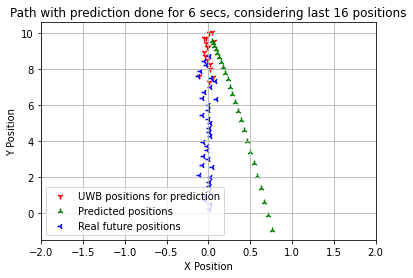

In [25]:
timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 45 #Oldest point taken into account for prediction at t = 1s
increment = 0
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

startingPoint = currentPoint-amountOfPoints


personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
print(currentErrorList)
plotter(xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


## Analysis 1: timeToPredict = 6s, currentPoint = 45, amountOfPoints = 12 (1000 iterations):

Due to the lack of consistency of the tests with a few iterations, more iterations have been done to identify a solid pattern. Every run the different calcualtions can vary a lot, but the result of the 10000 doesn't.

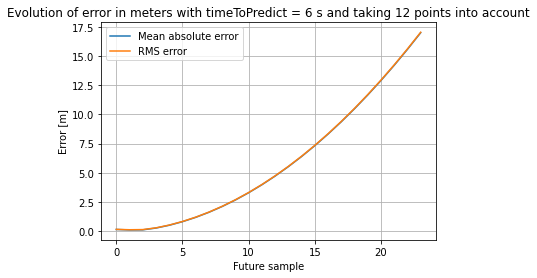

In [26]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 45 #Oldest point taken into account for prediction at t = 1s
increment = 0
amountOfPoints = 12 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors1 = calcualteAverageError(totalErrorList)
RMSErrors1 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors1, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors1, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()

## Analysis 2: timeToPredict = 6s, currentPoint = 45, amountOfPoints = 16 (10000 iterations):

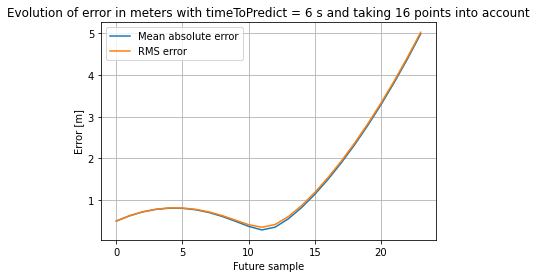

In [27]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 45 #Oldest point taken into account for prediction at t = 0s
increment = 0
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors2 = calcualteAverageError(totalErrorList)
RMSErrors2 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors2, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors2, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


## Analysis 2: timeToPredict = 6s, currentPoint = 45, amountOfPoints = 20 (10000 iterations):

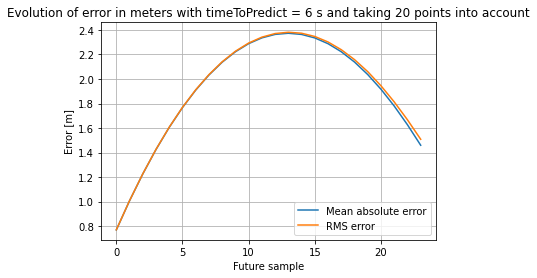

In [28]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 45 #Oldest point taken into account for prediction at t = 0s
increment = 0
amountOfPoints = 20 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors3 = calcualteAverageError(totalErrorList)
RMSErrors3 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors3, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors3, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


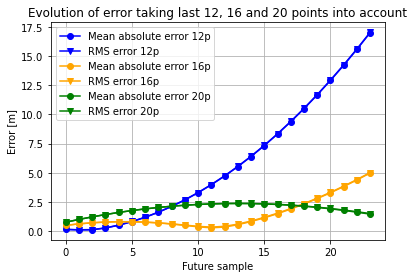

In [29]:
plt.figure()
plt.title("Evolution of error taking last 12, 16 and 20 points into account")
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.plot(sampleArray, averageErrors1, label="Mean absolute error 12p", color="b", marker = "o")
plt.plot(sampleArray, RMSErrors1, label="RMS error 12p", color="b", marker = "v")
plt.plot(sampleArray, averageErrors2, label="Mean absolute error 16p", color="orange", marker = "o")
plt.plot(sampleArray, RMSErrors2, label="RMS error 16p", color="orange", marker = "v")
plt.plot(sampleArray, averageErrors3, label="Mean absolute error 20p", color="green", marker = "o")
plt.plot(sampleArray, RMSErrors3, label="RMS error 20p", color="green", marker = "v")
plt.legend()
plt.show()

# Point 4 analysis:
A point after the turn has been taken, 4 points show the turn but all the previous ones used for the prediction are still part of the first section, when the moving agent was going forward

In [30]:
xPositions = np.zeros(41)
yPositions = np.arange(0, 10.25, 0.25)

extraX = np.zeros(41)
extraY = np.arange(10, -0.25, -0.25)

xPositions = np.append(xPositions, extraX)
yPositions = np.append(yPositions, extraY)

gaussianNoise = np.random.normal(0,0.05,82)


index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

## General plot: timeToPredict = 6s, currentPoint = 54 , amountOfPoints = 16

[0.36754458699930037, 0.5626456265981304, 0.7103822447351896, 0.9637107735638161, 1.1558445199233505, 1.375176598773166, 1.6310129054278297, 1.999310531089365, 2.3321565830661206, 2.7001255266455884, 3.00712354912432, 3.3919784843332557, 3.7601480373649867, 4.279179968628019, 4.692222183934288, 5.153072428475003, 5.733051338549396, 6.269000304405733, 6.785964630193306, 7.362697520591189, 7.9150002340618535, 8.569854814852892, 9.261905866828059, 9.787245215102573]


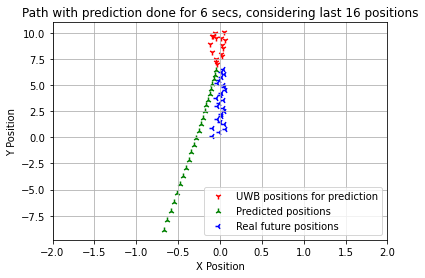

In [31]:
timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 54 #Oldest point taken into account for prediction at t = 1s
increment = 0
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

startingPoint = currentPoint-amountOfPoints


personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
print(currentErrorList)
plotter(xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


## Analysis 1: timeToPredict = 6s, currentPoint = 54, amountOfPoints = 12 (1000 iterations):

Due to the lack of consistency of the tests with a few iterations, more iterations have been done to identify a solid pattern. Every run the different calcualtions can vary a lot, but the result of the 10000 doesn't.

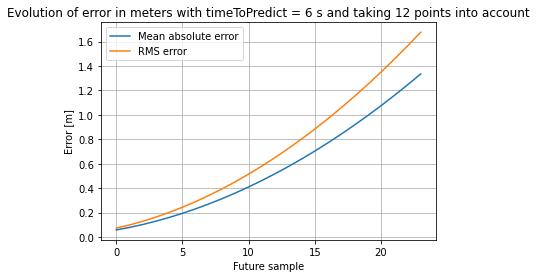

In [32]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 54 #Oldest point taken into account for prediction at t = 1s
increment = 0
amountOfPoints = 12 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1
        
    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors1 = calcualteAverageError(totalErrorList)
RMSErrors1 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors1, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors1, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()

## Analysis 2: timeToPredict = 6s, currentPoint = 54, amountOfPoints = 16 (10000 iterations):

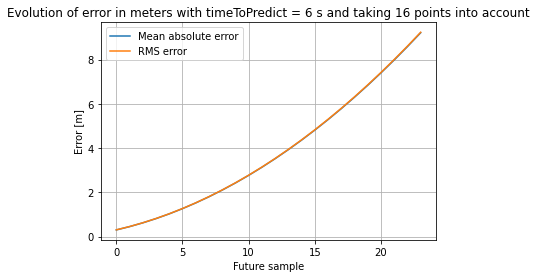

In [33]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 54 #Oldest point taken into account for prediction at t = 0s
increment = 0
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors2 = calcualteAverageError(totalErrorList)
RMSErrors2 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors2, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors2, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


## Analysis 2: timeToPredict = 6s, currentPoint = 54, amountOfPoints = 20 (10000 iterations):

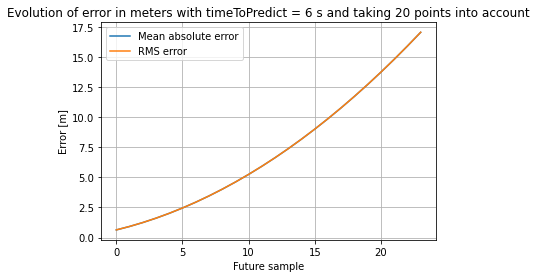

In [34]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 54 #Oldest point taken into account for prediction at t = 0s
increment = 0
amountOfPoints = 20 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(41)
    yPositions = np.arange(0, 10.25, 0.25)

    extraX = np.zeros(41)
    extraY = np.arange(10, -0.25, -0.25)

    xPositions = np.append(xPositions, extraX)
    yPositions = np.append(yPositions, extraY)
    
    gaussianNoise = np.random.normal(0,0.05,82)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors3 = calcualteAverageError(totalErrorList)
RMSErrors3 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors3, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors3, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


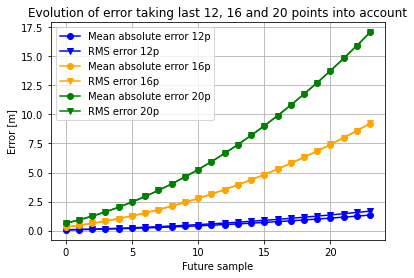

In [35]:
plt.figure()
plt.title("Evolution of error taking last 12, 16 and 20 points into account")
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.plot(sampleArray, averageErrors1, label="Mean absolute error 12p", color="b", marker = "o")
plt.plot(sampleArray, RMSErrors1, label="RMS error 12p", color="b", marker = "v")
plt.plot(sampleArray, averageErrors2, label="Mean absolute error 16p", color="orange", marker = "o")
plt.plot(sampleArray, RMSErrors2, label="RMS error 16p", color="orange", marker = "v")
plt.plot(sampleArray, averageErrors3, label="Mean absolute error 20p", color="green", marker = "o")
plt.plot(sampleArray, RMSErrors3, label="RMS error 20p", color="green", marker = "v")
plt.legend()
plt.show()

No more points are taken because the next analysis would be identical to the first one.